In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Proxy_Voting_Records.csv to Proxy_Voting_Records.csv


In [ ]:
df=pd.read_csv('Proxy_Voting_Records.csv')

/tmp/ipython-input-2410041593.py:1: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('Proxy_Voting_Records.csv')


In [ ]:
df.head()

,System,Company Name,Ticker,Country,Primary ISIN,Primary SEDOL,Provider Security ID,Meeting Type,Meeting Date,Record Date,Proponent,Proposal Number,Proposal Text,Vote Instruction,Vote Against Management,Ballot Cutoff Date
0,City,Conyers Park Acquisition Corp.,CPAA,USA,US82900L1026,BF27XF9,212894208,Special,07/05/2017,05/26/2017,Management,1,Approve SPAC Transaction,For,No,07/03/2017
1,City,Conyers Park Acquisition Corp.,CPAA,USA,US82900L1026,BF27XF9,212894208,Special,07/05/2017,05/26/2017,Management,A1,If you wish to Exercise your Redemption Rights...,Against,No,07/03/2017
2,City,Conyers Park Acquisition Corp.,CPAA,USA,US82900L1026,BF27XF9,212894208,Special,07/05/2017,05/26/2017,Management,A2,If you Certify that you are Not Acting in Conc...,For,No,07/03/2017
3,City,Conyers Park Acquisition Corp.,CPAA,USA,US82900L1026,BF27XF9,212894208,Special,07/05/2017,05/26/2017,Management,2,Adjourn Meeting,For,No,07/03/2017
4,City,"Galena Biopharma, Inc.",GALE,USA,US81642T1007,BDTMGW1,363256504,Special,07/06/2017,06/01/2017,Management,1,Ratify the 2011 Share Increase Amendment,For,No,07/05/2017


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3790916 entries, 0 to 3790915
Data columns (total 16 columns):
 #   Column                   Dtype 
---  ------                   ----- 
 0   System                   object
 1   Company Name             object
 2   Ticker                   object
 3   Country                  object
 4   Primary ISIN             object
 5   Primary SEDOL            object
 6   Provider Security ID     object
 7   Meeting Type             object
 8   Meeting Date             object
 9   Record Date              object
 10  Proponent                object
 11  Proposal Number          object
 12  Proposal Text            object
 13  Vote Instruction         object
 14  Vote Against Management  object
 15  Ballot Cutoff Date       object
dtypes: object(16)
memory usage: 462.8+ MB


In [ ]:
df.describe()

,System,Company Name,Ticker,Country,Primary ISIN,Primary SEDOL,Provider Security ID,Meeting Type,Meeting Date,Record Date,Proponent,Proposal Number,Proposal Text,Vote Instruction,Vote Against Management,Ballot Cutoff Date
count,3790910,3790916,3789133,3790916,3790896,3789869,3790916,3790916,3790916,3571821,3790916,3790916,3790916,3702770,3790916,796119
unique,20,23236,17416,89,18580,18727,20269,8,2280,2417,3,6134,282292,6,2,520
top,NYCC-49 Group Trust Global,Grupo Financiero Banorte SAB de CV,MC,USA,MXP370711014,2421041,P49501201,Annual,04/28/2022,03/31/2022,Management,2,Advisory Vote to Ratify Named Executive Office...,For,No,06/19/2019
freq,1250981,4312,4409,1278123,4492,4492,4492,3310752,25056,61988,3699700,316611,119913,2675038,2852534,17754


In [ ]:
df.isnull().sum()

,0
System,6
Company Name,0
Ticker,1783
Country,0
Primary ISIN,20
Primary SEDOL,1047
Provider Security ID,0
Meeting Type,0
Meeting Date,0
Record Date,219095


In [ ]:
df.dropna(inplace=True)

In [ ]:
df['Meeting Date']=pd.to_datetime(df['Meeting Date'])
df['Record Date' ]=pd.to_datetime(df['Record Date'])

In [ ]:
df['Ballot Cutoff Date']=pd.to_datetime(df['Ballot Cutoff Date'],errors='coerce')

In [ ]:
df['Meeting Type']= df['Meeting Type'].astype('category')
df['Vote Instruction']=df['Vote Instruction'].astype('category')
df['Vote Against Management']=df['Vote Against Management'].astype('category')


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

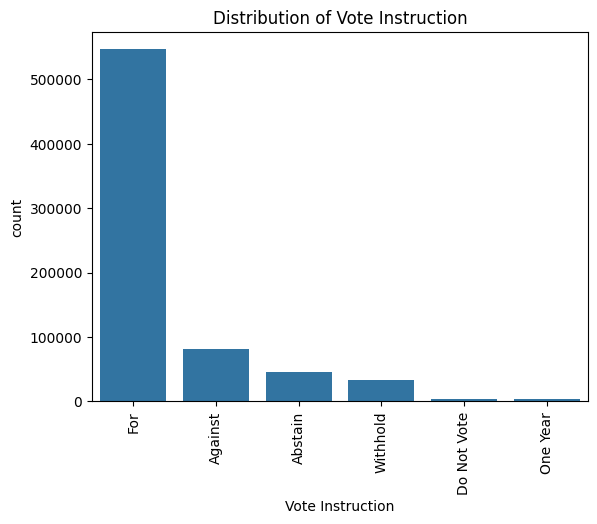

In [ ]:
sns.countplot(data=df,x='Vote Instruction',order=df['Vote Instruction'].value_counts().index)
plt.title('Distribution of Vote Instruction')
plt.xticks(rotation=90)
plt.show()

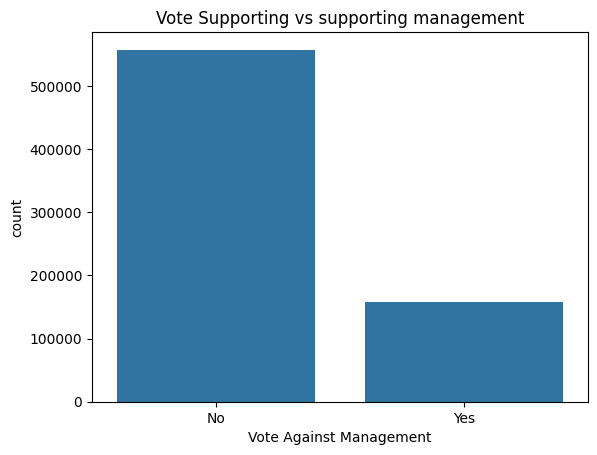

In [ ]:
sns.countplot(data=df,x='Vote Against Management')
plt.title('Vote Supporting vs supporting management')
plt.show()

In [ ]:
print(df['Vote Against Management'].value_counts(normalize=True)*100)

Vote Against Management
No     77.953773
Yes    22.046227
Name: proportion, dtype: float64


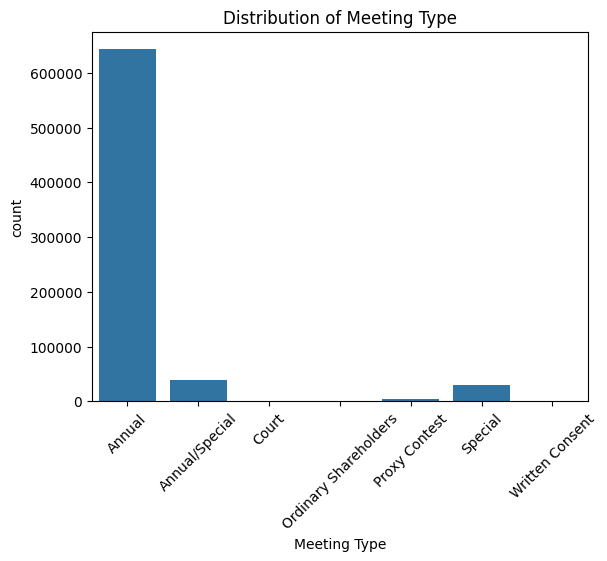

In [ ]:
sns.countplot(data=df,x='Meeting Type')
plt.title('Distribution of Meeting Type')
plt.xticks(rotation=45)
plt.show()

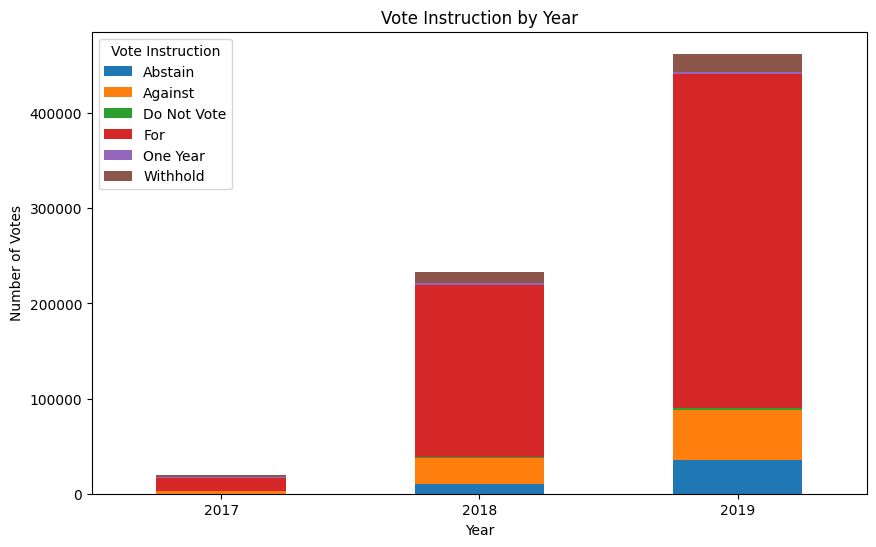

In [ ]:
df.groupby(df['Meeting Date'].dt.year)['Vote Instruction'].value_counts().unstack().plot(kind='bar',stacked=True,figsize=(10,6))
plt.title('Vote Instruction by Year')
plt.xlabel('Year')
plt.ylabel('Number of Votes')
plt.xticks(rotation=0)
plt.show()

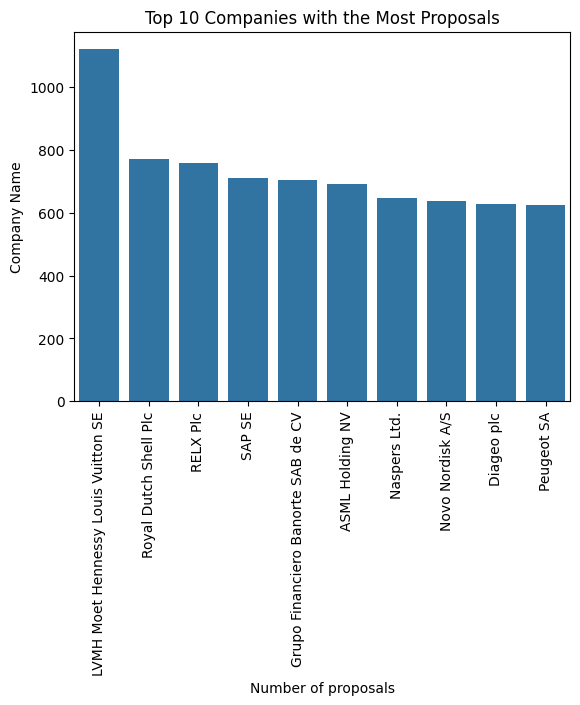

In [ ]:
top_companies=df['Company Name'].value_counts().head(10)
sns.barplot(x=top_companies.index,y=top_companies.values)
plt.title('Top 10 Companies with the Most Proposals')
plt.xlabel('Number of proposals')
plt.ylabel('Company Name')
plt.xticks(rotation=90)
plt.show()

In [ ]:
from collections import Counter

In [ ]:
import re

In [ ]:
all_text=' '.join(df['Proposal Text'].dropna())
words=re.findall(r'\w+',all_text.lower())
common_words=Counter(words).most_common(20)

In [ ]:
print('Most common words in proposal text:')
for word,count in common_words:
  print(word,":",count)

Most common words in proposal text:
director : 367406
elect : 363155
of : 200038
as : 151479
approve : 151325
to : 86033
and : 84129
ratify : 63863
the : 47383
auditors : 46914
board : 45242
vote : 40590
remuneration : 39533
a : 34976
for : 34468
llp : 33907
executive : 33118
advisory : 32632
compensation : 32458
directors : 30458


In [ ]:
df['Vote Against Management'].unique()

['No', 'Yes']
Categories (2, object): ['No', 'Yes']

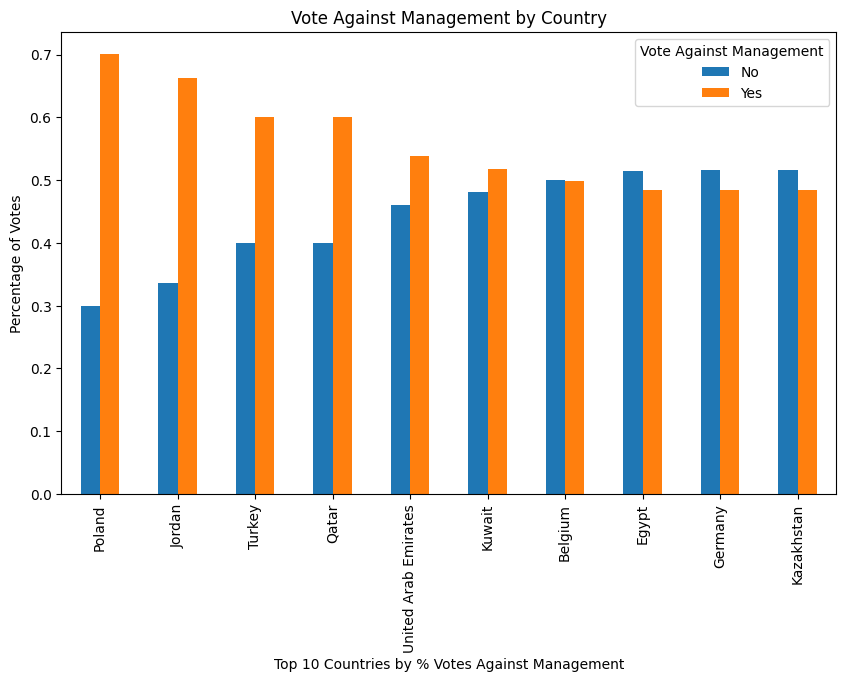

In [ ]:
country_votes = df.groupby('Country')['Vote Against Management'].value_counts(normalize=True).unstack().fillna(0)
country_votes.sort_values('Yes', ascending=False).head(10).plot(kind='bar', figsize=(10,6))
plt.title('Vote Against Management by Country')
plt.xlabel('Top 10 Countries by % Votes Against Management')
plt.ylabel('Percentage of Votes')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42,stratify=y)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model=RandomForestClassifier(n_estimators=200,random_state=42)
model.fit(x_train,y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

In [ ]:
y=model.predict(x_test)

In [ ]:
print('Accuracy Score:',accuracy_score(y_test,y))

Accuracy Score: 0.9839566456330829


In [ ]:
print("\nclassification Report:\n",classification_report(y_test,y))


classification Report:
               precision    recall  f1-score   support

     Abstain       0.97      0.97      0.97     13860
     Against       0.96      0.95      0.95     24262
 Do Not Vote       0.88      0.88      0.88      1328
         For       0.99      1.00      1.00    163798
    One Year       0.56      0.38      0.45      1200
    Withhold       0.93      0.96      0.94      9971

    accuracy                           0.98    214419
   macro avg       0.88      0.86      0.87    214419
weighted avg       0.98      0.98      0.98    214419

